In [3]:
from truncated import *
from Quantile import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [22]:
loc,scale,shape=10,2,3
N=1000
T=10000
L_Weibull=[]
for K in [9]:
    P=np.linspace(0,1,K+2)[1:-1]
    Q=scipy.stats.weibull_min(c=shape,loc=loc,scale=scale).ppf(P)
    L_Weibull.append(Gibbs_Quantile(T,N,Q,P,1,"weibull",std_prop_quantile=.02,par_prior=[0,10,2,2,2,2],List_X=True,epsilon=.001,std_prop1=5e-2,std_prop2=5e-2,std_prop3=2e-1))
    
    

Init loc = 10.676149288030437,scale = 1.115567681893118 shape = 1.5


100%|██████████| 10000/10000 [02:51<00:00, 58.16it/s]

I= [100. 200. 300. 400. 500. 600. 700. 800. 900.] Q.shape= (9, 10001)
Acceptance rate of Q 0 = 32.77%
Acceptance rate of Q 1 = 39.52%
Acceptance rate of Q 2 = 43.01%
Acceptance rate of Q 3 = 46.87%
Acceptance rate of Q 4 = 46.97%
Acceptance rate of Q 5 = 44.31%
Acceptance rate of Q 6 = 44.93%
Acceptance rate of Q 7 = 40.39%
Acceptance rate of Q 8 = 33.44%
Acceptation rate of loc = 41.51%, of scale = 45.60% and of shape = 39.70%


9.927316608134666 2.0745725621225994 3.119920274949605


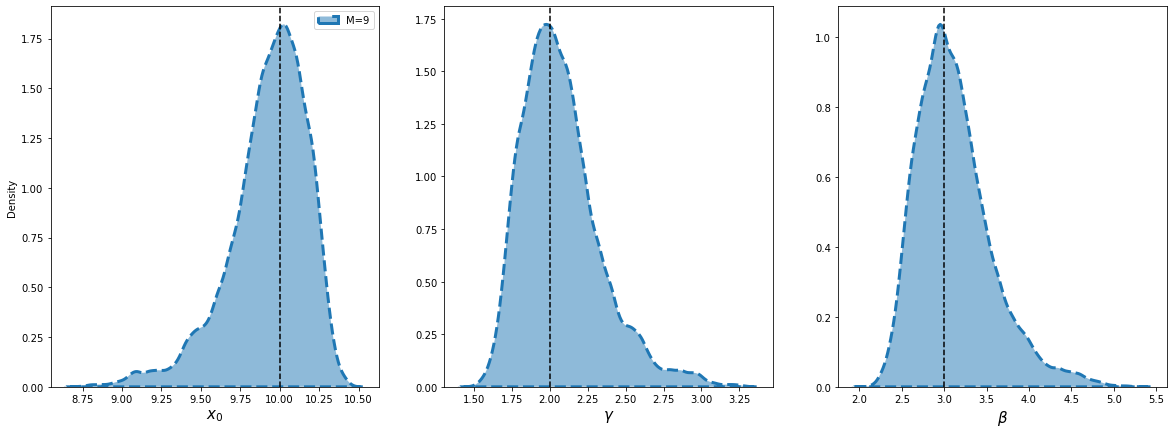

In [13]:

K=[9]
f,ax=plt.subplots(1,3,figsize=(20,7))
LS=["--","dotted","-.","-","-"]
burnin=5000
lw=3
for i,Gibbs in enumerate(L_Weibull[:]):
    sns.kdeplot(Gibbs["chains"][0][burnin:],ax=ax[0],label="M={}".format(K[i]),alpha=.5,fill=True,linewidth=lw,linestyle=LS[i])#multiple="stack"


    sns.kdeplot(Gibbs["chains"][1][burnin:],ax=ax[1],alpha=.5,fill=True,linewidth=lw,linestyle=LS[i])

    sns.kdeplot(Gibbs["chains"][2][burnin:],ax=ax[2],alpha=.5,fill=True,linewidth=lw,linestyle=LS[i])

    print(np.mean(Gibbs["chains"][0][burnin:]),np.mean(Gibbs["chains"][1][burnin:]),np.mean(Gibbs["chains"][2][burnin:]))

fontsize=15
ax[0].axvline(loc,color="black",linestyle="--")
ax[0].set_xlabel("$x_0$",fontsize=fontsize)
ax[1].axvline(scale,color="black",linestyle="--")
ax[1].set_xlabel("$\gamma$",fontsize=fontsize)
ax[1].set_ylabel("",fontsize=fontsize)
ax[2].axvline(shape,color="black",linestyle="--")
ax[2].set_xlabel("$\\beta$",fontsize=fontsize)
ax[2].set_ylabel("",fontsize=fontsize)

ax[0].legend()

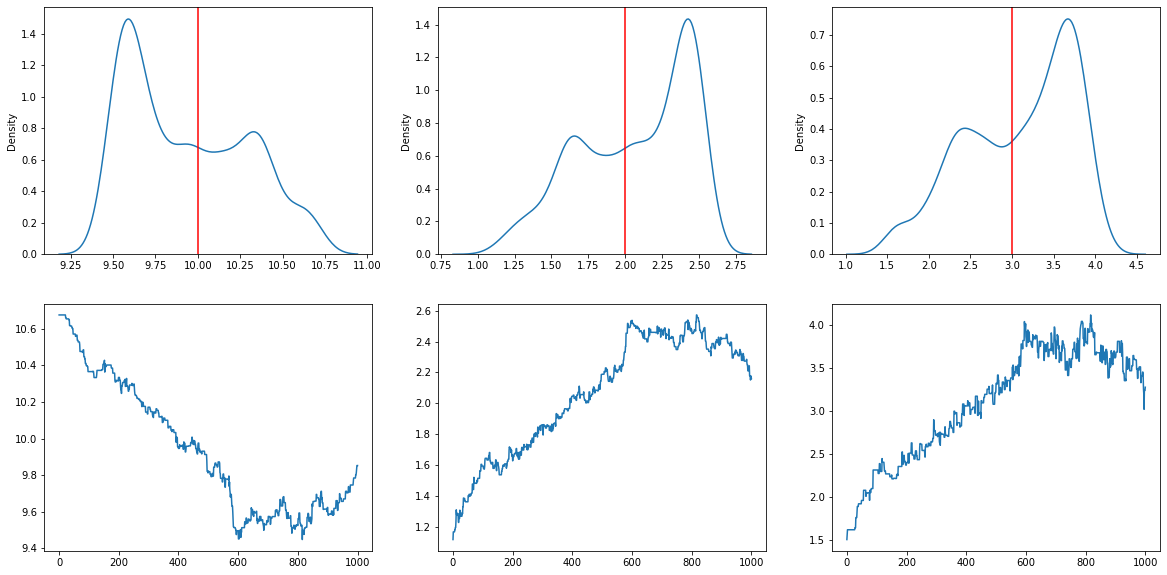

In [21]:
f,ax=plt.subplots(2,3,figsize=(20,10))
Gibbs=L_Weibull[0]
i=0
burnin=0
sns.kdeplot(Gibbs["chains"][0][burnin:],ax=ax[0,0])
ax[1,0].plot(Gibbs["chains"][0][burnin:])
ax[0,0].axvline(loc,color="red")

sns.kdeplot(Gibbs["chains"][1][burnin:],ax=ax[0,1])
ax[1,1].plot(Gibbs["chains"][1][burnin:])
ax[0,1].axvline(scale,color="red")

sns.kdeplot(Gibbs["chains"][2][burnin:],ax=ax[0,2])
ax[1,2].plot(Gibbs["chains"][2][burnin:])
ax[0,2].axvline(shape,color="red")